In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fileSuffixes = ['01', '05', '10', '25', '50', '75', 'full']
filePath = '../data/results_{}.csv'

percentages = np.array(['01', '05', '10', '25', '50', '75', '100']).astype(float)
trainRes = []
valRes = []
testRes = []

for suf in fileSuffixes:
    with open(filePath.format(suf)) as fp:
        sampleTrainRes, sampleValRes, sampleTestRes = fp.readline().strip().split(',')
    trainRes.append(float(sampleTrainRes))
    valRes.append(float(sampleValRes))
    testRes.append(float(sampleTestRes))

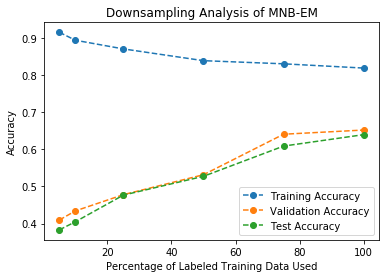

In [31]:
plt.plot(percentages[1:], trainRes[1:], 'o--', label='Training Accuracy')
plt.plot(percentages[1:], valRes[1:], 'o--', label='Validation Accuracy')
plt.plot(percentages[1:], testRes[1:], 'o--', label='Test Accuracy')
plt.legend()
plt.title('Downsampling Analysis of MNB-EM')
plt.xlabel('Percentage of Labeled Training Data Used')
plt.ylabel('Accuracy')
plt.savefig('../data/downsampling_EM.png')